Nicholas Paisley

1. Your commented, working code.Comments should explain what is going on in the algorithm.
2. Demonstrations of your code results including:
a. An evaluation of your NN accuracy; how well does it predict the observed targets based on the features as inputs.
b. A demonstration of the how the loss function decreases with each iteration (epoch). Plot a graph of loss function versus iteration. Do this for three different learning rates to show how convergence depends on learning rate.

Answers:

1. Code commented

2. a. I noticed that the initial predicted_targets are bad (before training). After training, I noticed that the higher the epoch is, the more consistent the targets predicted get to the targets observed. The lower the epoch, the worse the targets predicted compare to the targets observed.

2. b.  After the 3 tests at 100, 500 and 1000 epoch I can see that the convergence of the loss function gets quicker and smooths out faster. The 3 graphs are at the end of each section of code.

EPOCH 100

Starting ...
[[0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.]]
5
22
 Features :  [[0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.]
 [1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.]]
 Targets :  [[0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
 [1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.]]
 Targets predicted :  [[0.99974552 0.99988233 0.99749198 0.98078918 0.99953068 0.99757348
  0.99961542 0.99924565 0.99983496 0

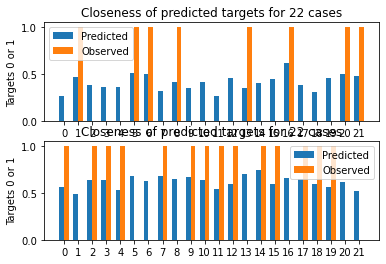

In [1]:
#importing libraries
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

def sigmoid(x): #Creating a definition for the sigmoid function
    return 1.0/(1+np.exp(-1.0*x)) #This is the sigmoid function. We are using this because we are looking at a logistic model of an NN (only having 2 solutions).

def feed_forward(features,w1,b1,w2,b2,w3,b3): #Creating a definition for "feed_foward". Basically the features,weights and biases going through the NN starting from the first 5 features going to the final 2.
    #Calculating Hidden Layer 1
    HL1 = np.matmul(w1,features) #multiplying our weights and features. Where the weights are a [4 x 5] and the the features are a [5 x 22] creating a [4 x 22] new matrix.
    HL1_with_bias = np.add(HL1,b1) #Adding the HL1 matrix (weights * features) which is a [4 x 22] to the biases which are also a [4 x 22].
    
    # Implement RELU activation (max(0,x)) 
    HL1_with_bias_and_activation = np.maximum(np.zeros((4,1)),HL1_with_bias) #We need to find the RELU to squish the numbers down to keep the numbers managable. 
    HL2 = np.matmul(w2,HL1_with_bias_and_activation) #multiplying our weights and features. Where the weights are a [3 x 4] and the the features are a [4 x 22] creating a [3 x 22] new matrix.
    HL2_with_bias = np.add(HL2,b2) #Adding the HL1 matrix (weights * features) which is a [3 x 22] to the biases which are also a [3 x 22].
    
    # Implement RELU activation
    HL2_with_bias_and_activation = np.maximum(HL2_with_bias,np.zeros((3,1))) #We need to find the RELU to squish the numbers down to keep the numbers managable.
    targets_predicted = np.matmul(w3,HL2_with_bias_and_activation) #multiplying our weights and features. Where the weights are a [2 x 3] and the the features are a [3 x 22] creating a [2 x 22] new matrix.
    targets_predicted = np.add(targets_predicted,b3) #Adding the HL1 matrix (weights * features) which is a [2 x 22] to the biases which are also a [2 x 22].
    
    # Use sigmoid for the output activation
    targets_predicted = sigmoid(targets_predicted) #Calling the sigmoid on the targets predicted to get them to become "squished" in between 0 and 1. 
    return targets_predicted #prints out the targets predicted.

def loss(features,w1,b1,w2,b2,w3,b3,targets_observed): #A method of evaluating how well your algorithm models your dataset. Greater is bad and lower is good.
    targets_predicted = feed_forward(features,w1,b1,w2,b2,w3,b3) #Getting the targets predicted to put into the loss function
    return np.sum((targets_predicted-targets_observed)**2) #Gives the loss function answer. The closer the sum is to 0, the closer the NN is to achieving the bests SSR. 
#=====================================================
    
print('Starting ...')

## Set up training data
## Each row is a case
## Columns 0-4 are features
## Columns 5 & 6 are targets

#22 x 7 matrix 
features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)

# shuffle our cases (to create randomness)
np.random.shuffle(features_and_targets)

# Need to transpose to get them as 5 X N matrices
features = np.transpose(features_and_targets[:,0:5]) #Tranposes the matrix to 5 x 22. Picking up the 0-4 index.
print(features) #prints the features in the array

# Need to transpose to get the 2 x N matrices
targets_observed = np.transpose(features_and_targets[:,5:7]) #Transposing the last 2 columns from N x 2 to a 2 x N. Picking up the 5 and 6 index
number_of_features,number_of_cases = features.shape #[5,22] (creating tuple (unchangable))
print(number_of_features) #prints the number of features in the array
print(number_of_cases) #prints the number of cases in the array
    
#Set initial weights and biases
    
weights_1 = np.random.rand(4,5) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_1 = np.random.rand(4,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

weights_2 = np.random.rand(3,4) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_2 = np.random.rand(3,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

weights_3 = np.random.rand(2,3) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_3 = np.random.rand(2,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

Targets_Predicted = feed_forward(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3) #Targets_Predicted before Epoch (before training is initialized)

#Printing the results to the following below:
print(' Features : ',features)
print(' Targets : ', targets_observed)
print(' Targets predicted : ', Targets_Predicted)

#Learning rate gives the rate of speed where the gradient moves during gradient descent. Setting it too high would make your path instable, too low would make convergence slow. Put it to zero means your model isn't learning anything from the gradients.

learning_rate = 0.01 #The amount of change to the model during each iterations
    
# Find slope functions using autograd
d_by_w1 = grad(loss,1) #create the derivative/gradient --> stored d_by_w1, (equation(loss), index=1 (weights_1))
d_by_b1 = grad(loss,2) #create the derivative/gradient --> stored d_by_b1, (equation(loss), index=2 (biases_1))
d_by_w2 = grad(loss,3) #create the derivative/gradient --> stored d_by_w2, (equation(loss), index=3 (weights_2))
d_by_b2 = grad(loss,4) #create the derivative/gradient --> stored d_by_b2, (equation(loss), index=4 (biases_2))
d_by_w3 = grad(loss,5) #create the derivative/gradient --> stored d_by_w3, (equation(loss), index=5 (weights_3))
d_by_b3 = grad(loss,6) #create the derivative/gradient --> stored d_by_b3, (equation(loss), index=6 (biases_3))

epoch_list1 = [] #creating list for epoch iterations
lost1 = [] #creating list for loss fucntion results 

#Setting the iteration (making higher helps making the loss function look better)
for epoch in range(100):
    
    #At each iteration update weights and biases by subtracting 
    #learning_rate times slope 
    #Changing the random weights and random biases updating each of them after each iteration according to range(X) 
    weights_1 -= learning_rate*d_by_w1(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_1 -= learning_rate*d_by_b1(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)  
    weights_2 -= learning_rate*d_by_w2(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_2 -= learning_rate*d_by_b2(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)   
    weights_3 -= learning_rate*d_by_w3(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_3 -= learning_rate*d_by_b3(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed) 

    #Print out the latest value of the loss 
    #We would expect this to go down with each iteration
    #This shows how good of a test it was to get to the desired the results
    #The closer to 0, the better the NN is learning <- This is what the loss function is doing in the equation.
    print(epoch,loss(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed))
    
    epoch_list1.append(epoch) #epoch list adding the iterations
    lost1.append(loss(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)) #loss function list adding for each iteration
    
Targets_Predicted = feed_forward(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3) #Targets_Predicted after Epoch (After training is complete)

#Printing the results to the following below:
print(' Features : ',features)
print(' Targets : ', targets_observed)
print(' Targets predicted : ', Targets_Predicted) 

N = 22
target1_predicted = Targets_Predicted[0,:] #The target we are trying to achieve 
target2_predicted = Targets_Predicted[1,:] #The target we are trying to achieve
target1_observed = targets_observed[0,:] #The target we want to achieve (what the targets should be) 
target2_observed = targets_observed[1,:] #The target we want to achieve (what the targets should be)

ind = np.arange(N) #Return evenly spaced values within a given interval (N=22)
width = 0.35 #creating width to add distance between the 2 different bar graphs
plt.subplot(2,1,1) #creating first graph
plt.bar(ind, target1_predicted, width, label='Predicted') #Plotting the bar graph of the predicted answers (First set)
plt.bar(ind + width, target1_observed, width,label='Observed') #Plotting the bar graph of the observed answers (First set)
plt.ylabel('Targets 0 or 1') #y label
plt.title('Closeness of predicted targets for 22 cases') #title
plt.xticks(ind + width / 2, ind) #tick mark indicator
plt.legend(loc='best') #legend (automatically put in best location)
plt.subplot(2,1,2) #creating first graph
plt.bar(ind, target2_predicted, width, label='Predicted') #Plotting the bar graph of the predicted answers (Second set)
plt.bar(ind + width, target2_observed, width,label='Observed') #Plotting the bar graph of the observed answers (Second set)
plt.ylabel('Targets 0 or 1') #y label
plt.title('Closeness of predicted targets for 22 cases') #title
plt.xticks(ind + width / 2, ind) #tick mark indicator
plt.legend(loc='best') #legend (automatically put in best location)

plt.show() #display graphs

Text(0.5, 1.0, 'Loss vs Epoch (100)')

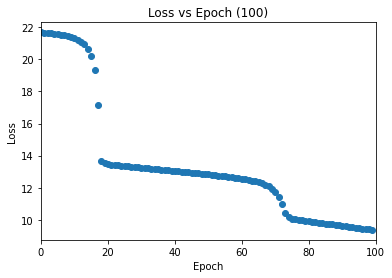

In [2]:
plt.scatter(x=epoch_list1,y=lost1)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(0,100)
plt.title('Loss vs Epoch (100)')

EPOCH 500

Starting ...
[[1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.]]
5
22
 Features :  [[1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.]]
 Targets :  [[1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.]]
 Targets predicted :  [[0.99971564 0.99984954 0.99715073 0.99970074 0.99987584 0.9996942
  0.99912618 0.99696804 0.99258852 0.

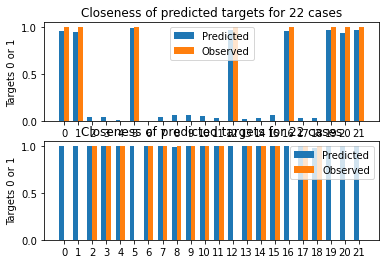

In [3]:
def sigmoid(x): #Creating a definition for the sigmoid function
    return 1.0/(1+np.exp(-1.0*x)) #This is the sigmoid function. We are using this because we are looking at a logistic model of an NN (only having 2 solutions).

def feed_forward(features,w1,b1,w2,b2,w3,b3): #Creating a definition for "feed_foward". Basically the features,weights and biases going through the NN starting from the first 5 features going to the final 2.
    #Calculating Hidden Layer 1
    HL1 = np.matmul(w1,features) #multiplying our weights and features. Where the weights are a [4 x 5] and the the features are a [5 x 22] creating a [4 x 22] new matrix.
    HL1_with_bias = np.add(HL1,b1) #Adding the HL1 matrix (weights * features) which is a [4 x 22] to the biases which are also a [4 x 22].
    
    # Implement RELU activation (max(0,x)) 
    HL1_with_bias_and_activation = np.maximum(np.zeros((4,1)),HL1_with_bias) #We need to find the RELU to squish the numbers down to keep the numbers managable. 
    HL2 = np.matmul(w2,HL1_with_bias_and_activation) #multiplying our weights and features. Where the weights are a [3 x 4] and the the features are a [4 x 22] creating a [3 x 22] new matrix.
    HL2_with_bias = np.add(HL2,b2) #Adding the HL1 matrix (weights * features) which is a [3 x 22] to the biases which are also a [3 x 22].
    
    # Implement RELU activation
    HL2_with_bias_and_activation = np.maximum(HL2_with_bias,np.zeros((3,1))) #We need to find the RELU to squish the numbers down to keep the numbers managable.
    targets_predicted = np.matmul(w3,HL2_with_bias_and_activation) #multiplying our weights and features. Where the weights are a [2 x 3] and the the features are a [3 x 22] creating a [2 x 22] new matrix.
    targets_predicted = np.add(targets_predicted,b3) #Adding the HL1 matrix (weights * features) which is a [2 x 22] to the biases which are also a [2 x 22].
    
    # Use sigmoid for the output activation
    targets_predicted = sigmoid(targets_predicted) #Calling the sigmoid on the targets predicted to get them to become "squished" in between 0 and 1. 
    return targets_predicted #prints out the targets predicted.

def loss(features,w1,b1,w2,b2,w3,b3,targets_observed): #A method of evaluating how well your algorithm models your dataset. Greater is bad and lower is good.
    targets_predicted = feed_forward(features,w1,b1,w2,b2,w3,b3) #Getting the targets predicted to put into the loss function
    return np.sum((targets_predicted-targets_observed)**2) #Gives the loss function answer. The closer the sum is to 0, the closer the NN is to achieving the bests SSR. 
#=====================================================
print('Starting ...')

## Set up training data
## Each row is a case
## Columns 0-4 are features
## Columns 5 & 6 are targets

#22 x 7 matrix 
features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)

# shuffle our cases (to create randomness)
np.random.shuffle(features_and_targets)

# Need to transpose to get them as 5 X N matrices
features = np.transpose(features_and_targets[:,0:5]) #Tranposes the matrix to 5 x 22. Picking up the 0-4 index.
print(features) #prints the features in the array

# Need to transpose to get the 2 x N matrices
targets_observed = np.transpose(features_and_targets[:,5:7]) #Transposing the last 2 columns from N x 2 to a 2 x N. Picking up the 5 and 6 index
number_of_features,number_of_cases = features.shape #[5,22] (creating tuple (unchangable))
print(number_of_features) #prints the number of features in the array
print(number_of_cases) #prints the number of cases in the array
    
#Set initial weights and biases
    
weights_1 = np.random.rand(4,5) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_1 = np.random.rand(4,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

weights_2 = np.random.rand(3,4) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_2 = np.random.rand(3,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

weights_3 = np.random.rand(2,3) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_3 = np.random.rand(2,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

Targets_Predicted = feed_forward(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3) #Targets_Predicted before Epoch (before training is initialized)

#Printing the results to the following below:
print(' Features : ',features)
print(' Targets : ', targets_observed)
print(' Targets predicted : ', Targets_Predicted)

#Learning rate gives the rate of speed where the gradient moves during gradient descent. Setting it too high would make your path instable, too low would make convergence slow. Put it to zero means your model isn't learning anything from the gradients.

learning_rate = 0.01 #The amount of change to the model during each iterations
    
# Find slope functions using autograd
d_by_w1 = grad(loss,1) #create the derivative/gradient --> stored d_by_w1, (equation(loss), index=1 (weights_1))
d_by_b1 = grad(loss,2) #create the derivative/gradient --> stored d_by_b1, (equation(loss), index=2 (biases_1))
d_by_w2 = grad(loss,3) #create the derivative/gradient --> stored d_by_w2, (equation(loss), index=3 (weights_2))
d_by_b2 = grad(loss,4) #create the derivative/gradient --> stored d_by_b2, (equation(loss), index=4 (biases_2))
d_by_w3 = grad(loss,5) #create the derivative/gradient --> stored d_by_w3, (equation(loss), index=5 (weights_3))
d_by_b3 = grad(loss,6) #create the derivative/gradient --> stored d_by_b3, (equation(loss), index=6 (biases_3))

epoch_list2 = [] #creating list for epoch iterations
lost2 = [] #creating list for loss fucntion results 

#Setting the iteration (making higher helps making the loss function look better)
for epoch in range(500):
    
    #At each iteration update weights and biases by subtracting 
    #learning_rate times slope 
    #Changing the random weights and random biases updating each of them after each iteration according to range(X) 
    weights_1 -= learning_rate*d_by_w1(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_1 -= learning_rate*d_by_b1(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)  
    weights_2 -= learning_rate*d_by_w2(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_2 -= learning_rate*d_by_b2(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)   
    weights_3 -= learning_rate*d_by_w3(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_3 -= learning_rate*d_by_b3(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed) 

    #Print out the latest value of the loss 
    #We would expect this to go down with each iteration
    #This shows how good of a test it was to get to the desired the results
    #The closer to 0, the better the NN is learning <- This is what the loss function is doing in the equation.
    print(epoch,loss(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed))
    
    epoch_list2.append(epoch) #epoch list adding the iterations
    lost2.append(loss(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)) #loss function list adding for each iteration
    
Targets_Predicted = feed_forward(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3) #Targets_Predicted after Epoch (After training is complete)

#Printing the results to the following below:
print(' Features : ',features)
print(' Targets : ', targets_observed)
print(' Targets predicted : ', Targets_Predicted) 

N = 22
target1_predicted = Targets_Predicted[0,:] #The target we are trying to achieve 
target2_predicted = Targets_Predicted[1,:] #The target we are trying to achieve
target1_observed = targets_observed[0,:] #The target we want to achieve (what the targets should be) 
target2_observed = targets_observed[1,:] #The target we want to achieve (what the targets should be)

ind = np.arange(N) #Return evenly spaced values within a given interval (N=22)
width = 0.35 #creating width to add distance between the 2 different bar graphs
plt.subplot(2,1,1) #creating first graph
plt.bar(ind, target1_predicted, width, label='Predicted') #Plotting the bar graph of the predicted answers (First set)
plt.bar(ind + width, target1_observed, width,label='Observed') #Plotting the bar graph of the observed answers (First set)
plt.ylabel('Targets 0 or 1') #y label
plt.title('Closeness of predicted targets for 22 cases') #title
plt.xticks(ind + width / 2, ind) #tick mark indicator
plt.legend(loc='best') #legend (automatically put in best location)
plt.subplot(2,1,2) #creating first graph
plt.bar(ind, target2_predicted, width, label='Predicted') #Plotting the bar graph of the predicted answers (Second set)
plt.bar(ind + width, target2_observed, width,label='Observed') #Plotting the bar graph of the observed answers (Second set)
plt.ylabel('Targets 0 or 1') #y label
plt.title('Closeness of predicted targets for 22 cases') #title
plt.xticks(ind + width / 2, ind) #tick mark indicator
plt.legend(loc='best') #legend (automatically put in best location)

plt.show() #display graphs

Text(0.5, 1.0, 'Loss vs Epoch (500)')

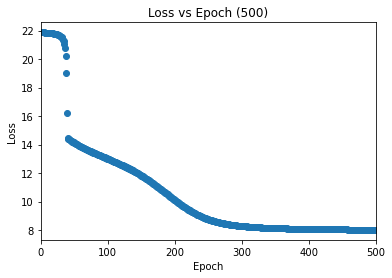

In [4]:
plt.scatter(x=epoch_list2,y=lost2)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(0,500)
plt.title('Loss vs Epoch (500)')

EPOCH 1000

Starting ...
[[0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]
 [1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.]]
5
22
 Features :  [[0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.]
 [1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1.]]
 Targets :  [[0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.]]
 Targets predicted :  [[0.98363339 0.99553079 0.99934737 0.95257727 0.99826303 0.99871201
  0.98919614 0.99883202 0.99019502 0

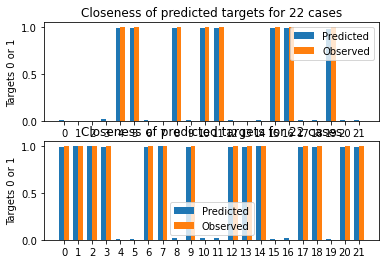

In [5]:
def sigmoid(x): #Creating a definition for the sigmoid function
    return 1.0/(1+np.exp(-1.0*x)) #This is the sigmoid function. We are using this because we are looking at a logistic model of an NN (only having 2 solutions).

def feed_forward(features,w1,b1,w2,b2,w3,b3): #Creating a definition for "feed_foward". Basically the features,weights and biases going through the NN starting from the first 5 features going to the final 2.
    #Calculating Hidden Layer 1
    HL1 = np.matmul(w1,features) #multiplying our weights and features. Where the weights are a [4 x 5] and the the features are a [5 x 22] creating a [4 x 22] new matrix.
    HL1_with_bias = np.add(HL1,b1) #Adding the HL1 matrix (weights * features) which is a [4 x 22] to the biases which are also a [4 x 22].
    
    # Implement RELU activation (max(0,x))
    HL1_with_bias_and_activation = np.maximum(np.zeros((4,1)),HL1_with_bias) #We need to find the RELU to squish the numbers down to keep the numbers managable. 
    HL2 = np.matmul(w2,HL1_with_bias_and_activation) #multiplying our weights and features. Where the weights are a [3 x 4] and the the features are a [4 x 22] creating a [3 x 22] new matrix.
    HL2_with_bias = np.add(HL2,b2) #Adding the HL1 matrix (weights * features) which is a [3 x 22] to the biases which are also a [3 x 22].
    
    # Implement RELU activation
    HL2_with_bias_and_activation = np.maximum(HL2_with_bias,np.zeros((3,1))) #We need to find the RELU to squish the numbers down to keep the numbers managable.
    targets_predicted = np.matmul(w3,HL2_with_bias_and_activation) #multiplying our weights and features. Where the weights are a [2 x 3] and the the features are a [3 x 22] creating a [2 x 22] new matrix.
    targets_predicted = np.add(targets_predicted,b3) #Adding the HL1 matrix (weights * features) which is a [2 x 22] to the biases which are also a [2 x 22].
    
    # Use sigmoid for the output activation
    targets_predicted = sigmoid(targets_predicted) #Calling the sigmoid on the targets predicted to get them to become "squished" in between 0 and 1. 
    return targets_predicted #prints out the targets predicted.

def loss(features,w1,b1,w2,b2,w3,b3,targets_observed): #A method of evaluating how well your algorithm models your dataset. Greater is bad and lower is good.
    targets_predicted = feed_forward(features,w1,b1,w2,b2,w3,b3) #Getting the targets predicted to put into the loss function
    return np.sum((targets_predicted-targets_observed)**2) #Gives the loss function answer. The closer the sum is to 0, the closer the NN is to achieving the bests SSR. 
#=====================================================
print('Starting ...')

## Set up training data
## Each row is a case
## Columns 0-4 are features
## Columns 5 & 6 are targets

#22 x 7 matrix 
features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)

# shuffle our cases (to create randomness)
np.random.shuffle(features_and_targets)

# Need to transpose to get them as 5 X N matrices
features = np.transpose(features_and_targets[:,0:5]) #Tranposes the matrix to 5 x 22. Picking up the 0-4 index.
print(features) #prints the features in the array

# Need to transpose to get the 2 x N matrices
targets_observed = np.transpose(features_and_targets[:,5:7]) #Transposing the last 2 columns from N x 2 to a 2 x N. Picking up the 5 and 6 index
number_of_features,number_of_cases = features.shape #[5,22] (creating tuple (unchangable))
print(number_of_features) #prints the number of features in the array
print(number_of_cases) #prints the number of cases in the array
    
#Set initial weights and biases
    
weights_1 = np.random.rand(4,5) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_1 = np.random.rand(4,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

weights_2 = np.random.rand(3,4) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_2 = np.random.rand(3,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

weights_3 = np.random.rand(2,3) #Setting the dimensions of the matrix for our random weights (rows by columns)
biases_3 = np.random.rand(2,number_of_cases) #Setting the dimensions of the matrix for our baises (rows by columns)

Targets_Predicted = feed_forward(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3) #Targets_Predicted before Epoch (before training is initialized)

#Printing the results to the following below:
print(' Features : ',features)
print(' Targets : ', targets_observed)
print(' Targets predicted : ', Targets_Predicted)

#Learning rate gives the rate of speed where the gradient moves during gradient descent. Setting it too high would make your path instable, too low would make convergence slow. Put it to zero means your model isn't learning anything from the gradients.

learning_rate = 0.01 #The amount of change to the model during each iterations
    
# Find slope functions using autograd
d_by_w1 = grad(loss,1) #create the derivative/gradient --> stored d_by_w1, (equation(loss), index=1 (weights_1))
d_by_b1 = grad(loss,2) #create the derivative/gradient --> stored d_by_b1, (equation(loss), index=2 (biases_1))
d_by_w2 = grad(loss,3) #create the derivative/gradient --> stored d_by_w2, (equation(loss), index=3 (weights_2))
d_by_b2 = grad(loss,4) #create the derivative/gradient --> stored d_by_b2, (equation(loss), index=4 (biases_2))
d_by_w3 = grad(loss,5) #create the derivative/gradient --> stored d_by_w3, (equation(loss), index=5 (weights_3))
d_by_b3 = grad(loss,6) #create the derivative/gradient --> stored d_by_b3, (equation(loss), index=6 (biases_3))

epoch_list3 = [] #creating list for epoch iterations
lost3 = [] #creating list for loss fucntion results 

#Setting the iteration (making higher helps making the loss function look better)
for epoch in range(1000):
    
    #At each iteration update weights and biases by subtracting 
    #learning_rate times slope 
    #Changing the random weights and random biases updating each of them after each iteration according to range(X) 
    weights_1 -= learning_rate*d_by_w1(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_1 -= learning_rate*d_by_b1(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)  
    weights_2 -= learning_rate*d_by_w2(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_2 -= learning_rate*d_by_b2(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)   
    weights_3 -= learning_rate*d_by_w3(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)
    biases_3 -= learning_rate*d_by_b3(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed) 

    #Print out the latest value of the loss 
    #We would expect this to go down with each iteration
    #This shows how good of a test it was to get to the desired the results
    #The closer to 0, the better the NN is learning <- This is what the loss function is doing in the equation.
    print(epoch,loss(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed))
    
    epoch_list3.append(epoch) #epoch list adding the iterations
    lost3.append(loss(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3,targets_observed)) #loss function list adding for each iteration
    
Targets_Predicted = feed_forward(features,weights_1,biases_1,weights_2,biases_2,weights_3,biases_3) #Targets_Predicted after Epoch (After training is complete)

#Printing the results to the following below:
print(' Features : ',features)
print(' Targets : ', targets_observed)
print(' Targets predicted : ', Targets_Predicted) 

N = 22
target1_predicted = Targets_Predicted[0,:] #The target we are trying to achieve 
target2_predicted = Targets_Predicted[1,:] #The target we are trying to achieve
target1_observed = targets_observed[0,:] #The target we want to achieve (what the targets should be) 
target2_observed = targets_observed[1,:] #The target we want to achieve (what the targets should be)

ind = np.arange(N) #Return evenly spaced values within a given interval (N=22)
width = 0.35 #creating width to add distance between the 2 different bar graphs
plt.subplot(2,1,1) #creating first graph
plt.bar(ind, target1_predicted, width, label='Predicted') #Plotting the bar graph of the predicted answers (First set)
plt.bar(ind + width, target1_observed, width,label='Observed') #Plotting the bar graph of the observed answers (First set)
plt.ylabel('Targets 0 or 1') #y label
plt.title('Closeness of predicted targets for 22 cases') #title
plt.xticks(ind + width / 2, ind) #tick mark indicator
plt.legend(loc='best') #legend (automatically put in best location)
plt.subplot(2,1,2) #creating first graph
plt.bar(ind, target2_predicted, width, label='Predicted') #Plotting the bar graph of the predicted answers (Second set)
plt.bar(ind + width, target2_observed, width,label='Observed') #Plotting the bar graph of the observed answers (Second set)
plt.ylabel('Targets 0 or 1') #y label
plt.title('Closeness of predicted targets for 22 cases') #title
plt.xticks(ind + width / 2, ind) #tick mark indicator
plt.legend(loc='best') #legend (automatically put in best location)

plt.show() #display graphs

Text(0.5, 1.0, 'Loss vs Epoch (1000)')

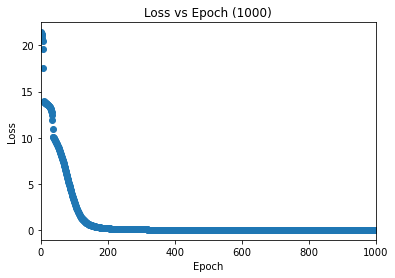

In [6]:
plt.scatter(x=epoch_list3,y=lost3)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xlim(0,1000)
plt.title('Loss vs Epoch (1000)')